In [1]:
import os
from IPython.display import Image

import rmgpy
from rmgpy.data.kinetics import KineticsDatabase
import pydot

In [2]:
label = 'Intra_R_Add_Endocyclic'
databasePath = rmgpy.settings['database.directory']
familyPath = os.path.join(databasePath, 'kinetics', 'families')

kinetics = KineticsDatabase()
kinetics.loadFamilies(familyPath, families=[label])


In [6]:
kinetics.families[label].groups.entries['R4_D'].parent

<Entry index=9 label="R4">

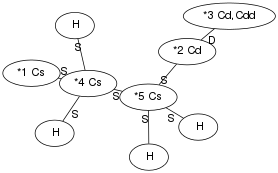

In [84]:
def drawGroup(group):
    graph = pydot.Dot(graph_type='graph', dpi="52")
    for index, atom in enumerate(group.atoms):
        atomType = '{0!s} '.format(atom.label if atom.label != '' else '')
        atomType += ','.join([atomType.label for atomType in atom.atomType])
        atomType = '"' + atomType + '"'
        graph.add_node(pydot.Node(name=str(index+1), label=atomType, fontname='Helvetica', fontsize="16"))
    for atom1 in group.atoms:
        for atom2, bond in atom1.bonds.iteritems():
            index1 = group.atoms.index(atom1)
            index2 = group.atoms.index(atom2)
            if index1 < index2:
                bondType = ','.join([order for order in bond.order])
                bondType = '"' + bondType + '"'
                graph.add_edge(pydot.Edge(
                    src = str(index1+1),
                    dst = str(index2+1),
                    label = bondType,
                    fontname='Helvetica', fontsize = "16",
                ))

png = graph.create_png(prog='neato')
Image(png)

In [ ]:
groups = []
graph2 = pydot.Dot(graph_type='graph', dpi='90')
for label, entry in kinetics.families[label].groups.entries.iteritems():
    groups.append((entry.level, label, ))